# CERN Open Data: Higgs Candidate Events
## Sample Tutorial for *ABSOLUTE BEGINNERS* using small-sized datasets
### PART I: Warm-up

Most datasets in the data portal are given as AODs which contain several .root files that are around a few GBs. 
They take a while to download. For starters, we begin with easy to handle datasets in the form of csv (comma-separated-values) files. 

#### Note: 
If one has space and time, the individual .root files can be downloaded into your personal machines. One can convert the files to csv files, which we will show later in the tutorial. For that you will need to install *ROOT* and *root_numpy* (easy to install if you're using OSX or Linux). 

### Let's Begin. 
We first import the libraries. Here we include the [pandas](http://pandas.pydata.org) library,  which is a very useful open-source tool for data analysis. Check out the link and look for instructions on how to download. Typically for OSX and linux distros, these can be downloaded using ```pip install pandas```. 

In [4]:
import pandas as pd 
import csv 
import numpy as np

### Input File
Download the two .csv files, http://opendata.cern.ch/record/300:
- 4lepton.csv
- diphoton.csv

If they don't automatically download as you expected, open your favorite editor (mine is *vim*), copy the data and save with the filenames above. To access the file, we use the pandas ```read_csv``` function. Put as an argument the location/path to the file enclosed in quotation marks. We then save them as [dataframes],(https://pandas.pydata.org/pandas-docs/stable/dsintro.html) ```df_diphoton``` and ```df_4lepton```.

In [8]:
df_diphoton = pd.read_csv("~/diphoton.csv")
df_4lepton = pd.read_csv("~/4lepton.csv")

You can check out what they look like by doing the following! 

In [6]:
df_diphoton

,Run,Event,pt1,eta1,phi1,pt2,eta2,phi2,M
0,199319,641436592,77.2006,0.250438,0.605505,60.1382,0.650821,-1.539000,122.797901
1,199699,336259924,64.1091,0.473667,-0.815133,58.6038,0.032018,2.585680,124.586979
2,201602,114902683,73.7489,0.800788,0.261020,55.9369,0.698872,3.035020,126.462830
3,202087,923352992,102.9550,0.979959,0.148624,76.6940,0.815527,1.673590,123.622542
4,203894,688901524,53.4409,-0.709665,1.642300,46.4314,0.945537,-2.716700,123.203887
5,203987,308416294,87.7908,-0.149925,2.368750,46.1165,0.076947,-0.292238,124.444405
6,203987,845945372,67.7696,-0.642111,-3.025220,61.0116,-0.602803,-0.374396,124.776915
7,204577,127412443,122.6290,-0.053727,-1.798130,45.6784,-0.294025,2.522860,125.704971
8,205667,719816916,48.7351,0.071595,-2.279340,73.5228,-1.075570,1.942460,125.691479
9,207924,315722300,118.3660,-0.857560,-0.505692,66.8998,-0.527230,-1.980810,123.273271


In [9]:
df_4lepton

,Run,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,...,Q3,E4,px4,py4,pz4,pt4,eta4,phi4,Q4,M
666626491,178424,129.372847,22.962996,-9.926535,126.931033,25.0167,2.326820,-0.408024,-1,83.523976,...,-1,9.845245,2.623166,-8.105335,-4.933582,8.51924,-0.550830,-1.25780,1,122.669828
400912970,193575,27.145963,19.450468,-4.777876,-18.323604,20.0287,-0.819877,-0.240874,1,41.454862,...,1,103.219547,-10.561126,-26.435983,-99.216311,28.46750,-1.961660,-1.95087,-1,121.891586
137440354,195099,92.596178,8.535392,-22.575753,-89.395321,24.1354,-2.020280,-1.209330,-1,59.812463,...,1,11.013022,-7.746924,6.874657,-3.743117,10.35740,-0.353958,2.41578,-1,127.047753


Check out what ```df_*.head()``` and ```df_*.info()``` does. The asterisk stands for wild card which serves the purpose of a placeholder. 

## Plotting
Again, we import some libraries that will aid us in our task. We'll only take a look at the diphotons. As we can see, the 4lepton case only has 3 events. 

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns #cosmetics 
sns.set(style="darkgrid")
import numpy as np
%matplotlib inline

from scipy.stats import norm
import matplotlib.mlab as mlab

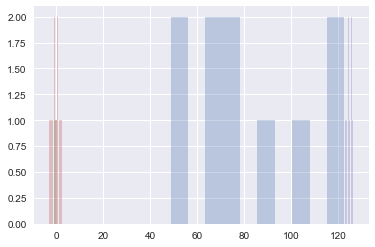

In [28]:
#fig, ((a,b),(c,d)) = plt.subplots(2,2)
a = df_diphoton.pt1
b = df_diphoton.eta1
c = df_diphoton.phi1
d = df_diphoton.M

plt.hist(a, alpha=.3)
plt.hist(b, alpha=.3)
plt.hist(c, alpha=.3)
plt.hist(d, alpha=.3)
plt.show()

Let's look at something familiar - the invariant mass of the diphotons. If you've been reading about it, you'd know it's around 125 GeV! Let's plot a histogram and fit a curve. There are only 10 events in this file but it's good to know how to fit a curve to a histogram. 

d = df_diphoton.M
n, bins, patches = plt.hist(d, alpha=.3, bins = 50)

# best fit of data
(mu, sigma) = norm.fit(d)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel(r'$m\gamma \gamma$ GeV')
plt.ylabel('Events')
plt.title('Invariant mass')
plt.grid(True)

plt.show()

#### Remember this? 

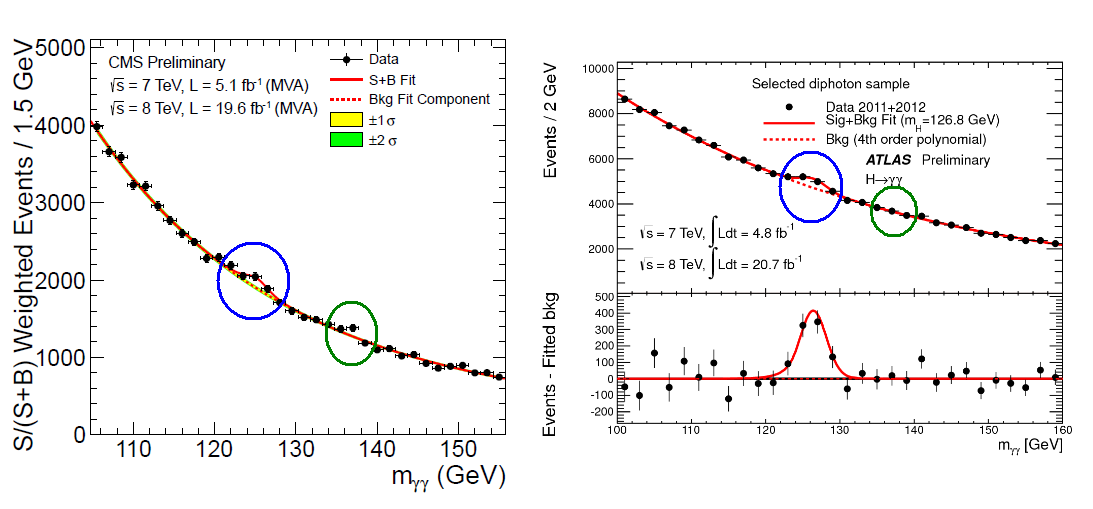

In [55]:
from IPython.display import Image
Image("/Users/up/Downloads/atlascms2ndhiggs.png")

Unfortunately, one can't really easily claim discovery with just 10 events for a physics experiment just like this. Usually, you would need a *significant* **excess of events over the background**. Hence, for more advanced analysis, we need to be able to handle more data. We continue using python and Jupyter notebook for a quick exploration of the datasets but eventually we will need to migrate to other frameworks that could handle large data without the need for manual downloading. One can proceed with donwloading the Virtual Machines provided by the CERN Open Data Portal. The VM will just fetch all the necessary files using the XRootD protocol. 

If you're still up to it, I'll teach you how to handle .root files using the python format and we'll take a look at JupyROOT and the C++ magics. 